## Toward Handling Toxic and Divisive Content on Social Media

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


## Pre-processing input texts

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
qid              1306122 non-null object
question_text    1306122 non-null object
target           1306122 non-null int64
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
# About 6% od the data has label 1

Counter(df['target'])

Counter({0: 1225312, 1: 80810})

In [6]:
stops=stopwords.words('english')+list(string.punctuation)

In [7]:
# load Glove vector
print('Loading word vectors...')
word2vec = {}
embedding = []
idx2word = []
with open('glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
print('Found %s word vectors.' % len(word2vec))
embedding = np.array(embedding)
V, D = embedding.shape
word2idx={word:index_no for index_no , word in enumerate(idx2word)}

Loading word vectors...
Found 400000 word vectors.


In [8]:
df['clean_text']=df['question_text'].apply(lambda x:[t for t in word_tokenize(x.lower()) if (t not in stops) & (t in idx2word)] )

In [9]:
df.head()

,qid,question_text,target,clean_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[quebec, nationalists, see, province, nation, ..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[adopted, dog, would, encourage, people, adopt..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[velocity, affect, time, velocity, affect, spa..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[otto, von, guericke, used, magdeburg, hemisph..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[convert, helicon, mountain, bike, changing, t..."


In [10]:
max(df.clean_text.apply(len))

78

In [11]:
df.shape[0]

1306122

In [12]:
df['clean_text_idx']=df['clean_text'].apply(lambda x:[word2idx[t] for t in x] )

In [13]:
df.head()

,qid,question_text,target,clean_text,clean_text_idx
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"[quebec, nationalists, see, province, nation, ...","[5074, 9186, 253, 624, 513, 2989]"
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"[adopted, dog, would, encourage, people, adopt...","[2181, 2926, 54, 3564, 69, 5045, 2855]"
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"[velocity, affect, time, velocity, affect, spa...","[12190, 3194, 79, 12190, 3194, 863, 13780]"
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"[otto, von, guericke, used, magdeburg, hemisph...","[9639, 4145, 219309, 180, 36018, 53471]"
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"[convert, helicon, mountain, bike, changing, t...","[7037, 136941, 1611, 7696, 2803, 21388]"


In [14]:
data_pad=pad_sequences(df['clean_text_idx'],maxlen=78)

In [15]:
data_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 5074, 9186,  253,  624,  513,
       2989])

In [16]:
labels=df['target']

In [17]:
labels=to_categorical(labels,num_classes=2)

## Wordcloud exploration for fun

In [18]:
df1=df[df['target']==1]['question_text']

In [19]:
text=df1.str.cat(sep=' ')

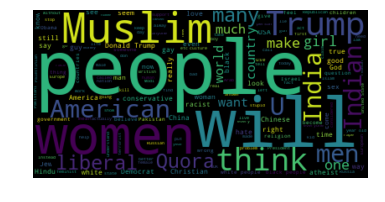

In [20]:
# Start with one review:
text=df1.str.cat(sep=' ')

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
df0=df[df['target']==0]['question_text']

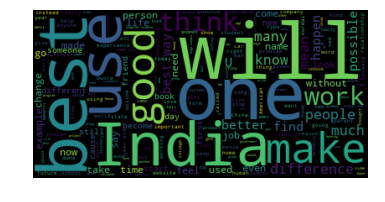

In [22]:
text0=df0.str.cat(sep=' ')

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text0)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Model Creation

In [23]:
lstm_hidden_units=64  # no of hidden units in 1 lstm cell
num_classes=2
embedding_size=100  # no of unrolling
num_epochs=1
sentence_len=78  # max sentence length in dataset
vocab_size=400000  # Glove vocab size

In [29]:
def model():
    
    x=tf.placeholder(tf.int32,shape=[None,sentence_len])  # input place holder
    y=tf.placeholder(tf.float32,shape=[None,2])
    
    w=tf.Variable(tf.random_normal([lstm_hidden_units,num_classes]))
    b=tf.Variable(tf.constant(0.1,shape=[num_classes]))
        
    Embedding = tf.get_variable(name="word_embedding", shape=[embedding.shape[0],embedding_size],initializer=tf.constant_initializer(embedding),trainable=False)                                
    embed_lookup=tf.nn.embedding_lookup(Embedding,x)
    
    lstm_cell=tf.contrib.rnn.BasicLSTMCell(lstm_hidden_units)
    current_batch_size=tf.shape(x)[0]
    initial_state=lstm_cell.zero_state(current_batch_size,dtype=tf.float32)
    outputs, _ =tf.nn.dynamic_rnn(lstm_cell,embed_lookup,initial_state=initial_state,dtype=tf.float32)
    outputs=tf.transpose(outputs,[1,0,2]) #output manipulation from batch_size x 78 x 64 to 78 x batch_size x 64
    last=tf.gather(outputs,int(outputs.get_shape()[0])-1)  # access the last element in the output vector
    
    predictions=tf.matmul(last,w)+b
    correct_predictions=tf.equal(tf.argmax(tf.nn.sigmoid(predictions),axis=1),tf.argmax(y,axis=1))
    accuracy=tf.reduce_mean(tf.cast(correct_predictions,tf.float32))   
    loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions,labels=y))
    optimizer=tf.train.AdamOptimizer(learning_rate=0.003).minimize(loss)
    
    return optimizer,loss,x,y,accuracy,predictions, correct_predictions
    

## Training and Testing

In [25]:
X_train,X_test, y_train,y_test=train_test_split(data_pad,labels,test_size=0.3,random_state=101)

In [26]:
X_train.shape

(914285, 78)

In [27]:
X_test.shape

(391837, 78)

In [36]:
tf.reset_default_graph()
optimizer,loss,x,y,accuracy,predictions, correct_predictions=model()

C:\Users\fatah\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [37]:
batch_size=32
num_batches=len(X_train)//batch_size


In [38]:
g = tf.Graph()
with tf.Session() as sesh:
    init=tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
    sesh.run(init)    
    saver = tf.train.Saver()
    writer= tf.summary.FileWriter("logdir/", graph = sesh.graph)    
    
    for i in range(num_batches):
        if i !=num_batches-1:
            x_batch=X_train[i*batch_size:i*batch_size+batch_size]
            y_batch=y_train[i*batch_size:i*batch_size+batch_size]
        else:
            x_batch=X_train[i*batch_size:]
            y_batch=y_train[i*batch_size:]
        
        # Randomly setting testing data to see performance when training
        rand_idx = np.random.choice(np.arange(len(X_test)),200, replace=False)
        test_x = X_test[rand_idx]
        test_y = y_test[rand_idx]
        
        _, l, a=sesh.run([optimizer,loss,accuracy],feed_dict={x:x_batch,y:y_batch})
        t_l, t_a=sesh.run([loss,accuracy],feed_dict={x:test_x,y:test_y})
        
        if i>0 and i % 500==0:
            print("Step",i,"of", num_batches,"loss",l,"accuracy",a)
            print("Test loss", t_l,"accuracy",t_a)
        if i > 0 and i % 500==0:
            saver.save(sesh, "logdir\\lstm_model.ckpt")
            writer.flush()
            writer.close()
            
tf.summary.FileWriter("logs", g).close()        
        
       
    

Step 500 of 28571 loss 0.0987595 accuracy 0.96875
Test loss 0.103202 accuracy 0.965
Step 1000 of 28571 loss 0.143304 accuracy 0.96875
Test loss 0.143112 accuracy 0.96
Step 1500 of 28571 loss 0.0728438 accuracy 1.0
Test loss 0.17404 accuracy 0.945
Step 2000 of 28571 loss 0.0907847 accuracy 1.0
Test loss 0.144096 accuracy 0.95
Step 2500 of 28571 loss 0.154738 accuracy 0.9375
Test loss 0.100512 accuracy 0.97
Step 3000 of 28571 loss 0.179628 accuracy 0.9375
Test loss 0.14437 accuracy 0.935
Step 3500 of 28571 loss 0.11037 accuracy 0.9375
Test loss 0.152431 accuracy 0.93
Step 4000 of 28571 loss 0.255322 accuracy 0.90625
Test loss 0.189132 accuracy 0.935
Step 4500 of 28571 loss 0.0537117 accuracy 1.0
Test loss 0.103822 accuracy 0.965
Step 5000 of 28571 loss 0.311092 accuracy 0.90625
Test loss 0.145247 accuracy 0.95
Step 5500 of 28571 loss 0.0938686 accuracy 0.9375
Test loss 0.186336 accuracy 0.935
Step 6000 of 28571 loss 0.262648 accuracy 0.90625
Test loss 0.187744 accuracy 0.925
Step 6500 of